In [1]:
# a) Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 1. Load Data

In [2]:
# b) Load dataset
movie_data = pd.read_csv("movies.dat",sep="::", header=None, names=['MovieID','Title','Genres'], 
                       dtype={'MovieID': np.int32, 'Title': np.str, 'Genres': np.str}, engine='python')
users_data = pd.read_csv("users.dat",sep="::", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], 
                       dtype={'UserID': np.int32, 'Gender': np.str, 'Age': np.int32, 'Occupation' : np.int32, 'Zip-code' : np.str}, engine='python')
ratings_data = pd.read_csv("ratings.dat",sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'], 
                       dtype={'UserID': np.int32, 'MovieID': np.int32, 'Rating': np.int32, 'Timestamp' : np.str}, engine='python')

## 2. Summarize Data

In [3]:
# a) Descriptive statistics 
# On movie_data
movie_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie_data.shape

(3883, 3)

In [5]:
movie_data.isnull().sum()
# Results show that no columns are empty or null

MovieID    0
Title      0
Genres     0
dtype: int64

In [6]:
movie_data.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [7]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int32
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int32(1), object(2)
memory usage: 76.0+ KB


In [8]:
# On users data
users_data.shape
# users_data.head(50)

(6040, 5)

In [9]:
users_data.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [10]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int32
Gender        6040 non-null object
Age           6040 non-null int32
Occupation    6040 non-null int32
Zip-code      6040 non-null object
dtypes: int32(3), object(2)
memory usage: 165.3+ KB


In [11]:
users_data.isnull().sum()
# Results show that no columns are empty or null

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [12]:
# On Ratings data
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [13]:
ratings_data.shape

(1000209, 4)

In [14]:
ratings_data.describe()

,UserID,MovieID,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


In [15]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int32
MovieID      1000209 non-null int32
Rating       1000209 non-null int32
Timestamp    1000209 non-null object
dtypes: int32(3), object(1)
memory usage: 19.1+ MB


In [16]:
ratings_data.isnull().sum()
# Results show that no columns are empty or null

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

<h2> Merge Data sets <h2>

In [17]:
df_ratings_users = pd.merge(ratings_data,users_data, on='UserID')

In [18]:
Master_Data = pd.merge(df_ratings_users,movie_data, on='MovieID')

In [19]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
UserID        1000209 non-null int32
MovieID       1000209 non-null int32
Rating        1000209 non-null int32
Timestamp     1000209 non-null object
Gender        1000209 non-null object
Age           1000209 non-null int32
Occupation    1000209 non-null int32
Zip-code      1000209 non-null object
Title         1000209 non-null object
Genres        1000209 non-null object
dtypes: int32(5), object(5)
memory usage: 64.9+ MB


In [20]:
# Master_Data.head()
Master_Data.shape

(1000209, 10)

In [21]:
Master_Data[(Master_Data.UserID == 1) & (Master_Data.Genres == 'Drama')]

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
2886,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
14006,1,2398,4,978302281,F,1,10,48067,Miracle on 34th Street (1947),Drama
19503,1,3105,5,978301713,F,1,10,48067,Awakenings (1990),Drama
32698,1,1545,4,978824139,F,1,10,48067,Ponette (1996),Drama
34073,1,3186,4,978300019,F,1,10,48067,"Girl, Interrupted (1999)",Drama
37204,1,1836,5,978300172,F,1,10,48067,"Last Days of Disco, The (1998)",Drama
40375,1,150,5,978301777,F,1,10,48067,Apollo 13 (1995),Drama
43703,1,1961,5,978301590,F,1,10,48067,Rain Man (1988),Drama
45033,1,1962,4,978301753,F,1,10,48067,Driving Miss Daisy (1989),Drama


## 3. Data Visualization

<h3> User Age Distribution </h3>

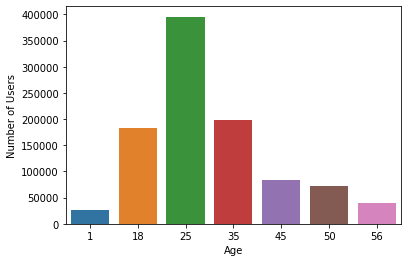

In [22]:
sns.barplot(x=Master_Data['Age'].value_counts().to_frame().index, y='Age', data = Master_Data['Age'].value_counts().to_frame())
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

<p>The above age distribution shows that most of the users are 25 years old</p> 

In [23]:
Master_Data_TS = Master_Data[Master_Data.Title == 'Toy Story (1995)']

In [24]:
pd.crosstab(Master_Data_TS.Rating, Master_Data_TS.Age)

Age,1,18,25,35,45,50,56
Rating,,,,,,,
1,2,6,2,3,1,1,1
2,6,14,27,3,5,2,4
3,25,92,105,60,25,25,13
4,45,190,332,154,59,38,17
5,34,146,324,203,53,42,18


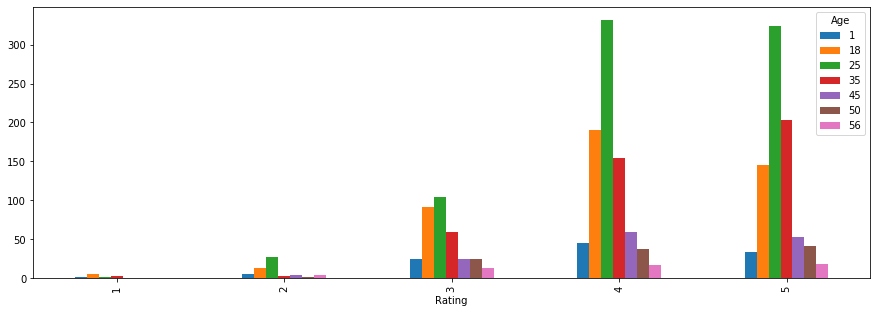

In [25]:
pd.crosstab(Master_Data_TS.Rating, Master_Data_TS.Age).plot.bar(figsize = (15, 5))

In [26]:
Master_Data[Master_Data.Rating == 5].Title.value_counts().head(25)

American Beauty (1999)                                   1963
Star Wars: Episode IV - A New Hope (1977)                1826
Raiders of the Lost Ark (1981)                           1500
Star Wars: Episode V - The Empire Strikes Back (1980)    1483
Godfather, The (1972)                                    1475
Schindler's List (1993)                                  1475
Shawshank Redemption, The (1994)                         1457
Matrix, The (1999)                                       1430
Saving Private Ryan (1998)                               1405
Sixth Sense, The (1999)                                  1385
Silence of the Lambs, The (1991)                         1350
Fargo (1996)                                             1278
Braveheart (1995)                                        1206
Pulp Fiction (1994)                                      1193
Princess Bride, The (1987)                               1186
Usual Suspects, The (1995)                               1144
Star War

In [27]:
Master_Data[Master_Data.UserID == 2696][['Title', 'Rating']]

,Title,Rating
24345,Back to the Future (1985),2
29848,E.T. the Extra-Terrestrial (1982),3
244232,L.A. Confidential (1997),4
250014,Lone Star (1996),5
273633,JFK (1991),1
277808,"Talented Mr. Ripley, The (1999)",4
371178,Midnight in the Garden of Good and Evil (1997),4
377250,Cop Land (1997),3
598042,Palmetto (1998),4
603189,"Perfect Murder, A (1998)",4


In [28]:
gender_group = users_data.groupby('Gender').size()
gender_group

Gender
F    1709
M    4331
dtype: int64

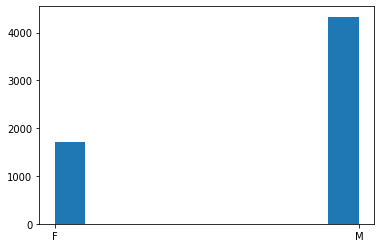

In [29]:
plt.hist(x=users_data.Gender)
plt.show()

<p> The above distribution shows that most of the users are Male</p>

<h2> User Ratings </h2>

In [30]:
user_group = ratings_data.groupby(['UserID']).size()
user_group.head(10)

UserID
1      53
2     129
3      51
4      21
5     198
6      71
7      31
8     139
9     106
10    401
dtype: int64

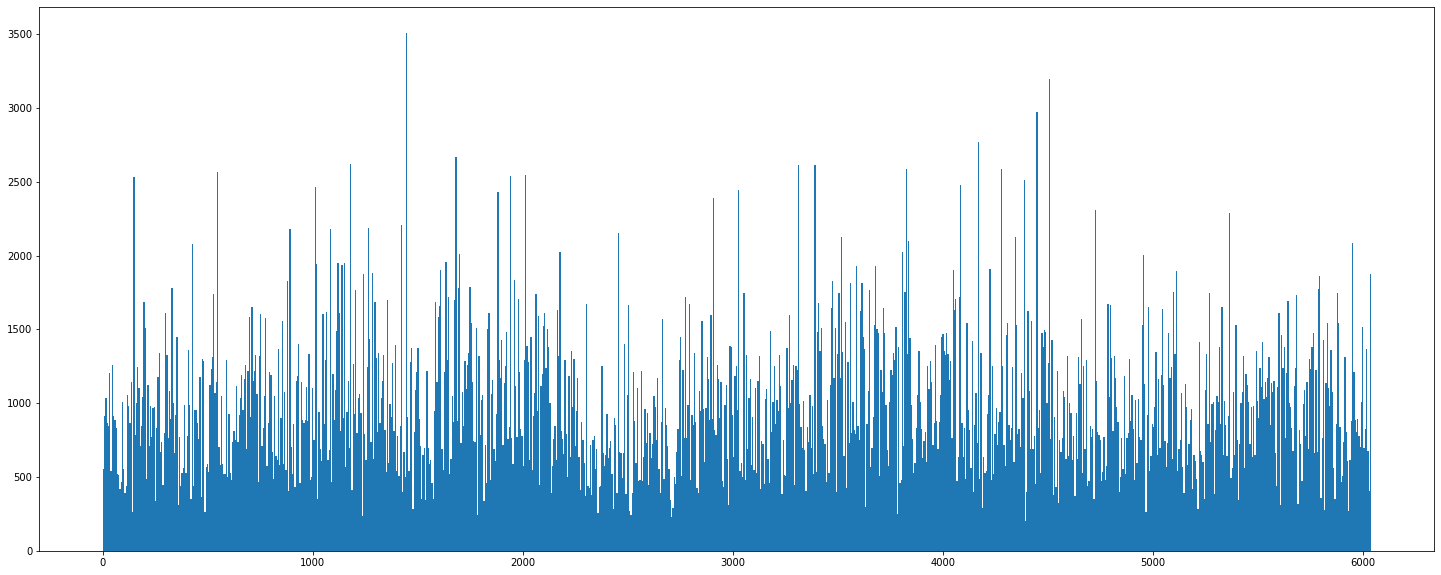

In [31]:
plt.figure(figsize=(25,10))
plt.hist(x=[ratings_data.UserID],bins=1000)
plt.show()

<h3> User Rating for Toystory Movie <h3>

In [32]:
toystory_data = ratings_data[ratings_data.MovieID==1]
toystory_data.head(10)

,UserID,MovieID,Rating,Timestamp
40,1,1,5,978824268
469,6,1,4,978237008
581,8,1,4,978233496
711,9,1,5,978225952
837,10,1,5,978226474
1966,18,1,4,978154768
2276,19,1,5,978555994
2530,21,1,3,978139347
2870,23,1,4,978463614
3405,26,1,3,978130703


In [33]:
toystory_data.groupby('Rating').size()

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

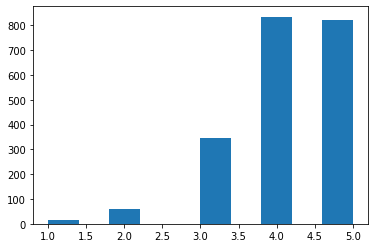

In [34]:
plt.hist(x=toystory_data['Rating'])
plt.show()

<p> From above plot it is clear that most users i.e. 835 has given 4 Stars to Movie Toystory </p>

<h2> Split data based on Genre Category </h2>

In [35]:
movie_data.Genres.str.get_dummies("|")

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [36]:
modified_movie_df = pd.concat([movie_data,movie_data.Genres.str.get_dummies("|")], axis=1)

In [37]:
modified_movie_df.head()

,MovieID,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2> Algorithm fitting </h2>

In [38]:
df_user_rating = pd.merge(ratings_data, users_data, how='left', left_on=['UserID'], right_on=['UserID'])

In [39]:
df_user_rating.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


<h3> Pre-Process data, selecting only 1st 500 rows </h3>

In [40]:
df_few = df_user_rating.head(500)
df_few.shape

(500, 8)

In [41]:
df_few.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [42]:
# preprocess data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df_few['Age'])
x_age = le.transform(df_few['Age'])
x_age

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [43]:
le.fit(df_few['Occupation'])
x_occ = le.transform(df_few['Occupation'])
x_occ

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [44]:
le.fit(df_few['MovieID'])
x_movieid = le.transform(df_few['MovieID'])
x_movieid

array([130,  78,  95, 374, 280, 132, 156, 321,  71,  96,  72,  98, 287,
       330, 107, 318, 304, 251, 355, 319, 274,  80, 154,  61, 278,  12,
       119, 211, 186,  84, 271, 364, 189,  67, 231,  86, 226, 103, 316,
        18,   0, 243, 244, 305,  29, 104, 105, 135, 252,  62, 359,  74,
       145, 161, 346, 184,  75, 264,  76, 266, 302, 121, 329, 379, 136,
       222, 205, 137, 392, 326, 342, 139, 355,  49, 260, 356, 357, 343,
       148, 194,  33, 265, 347,  92,  44, 149, 360, 185, 158, 127, 366,
       367, 368,  17, 267, 293, 225, 380,  68, 207, 398, 323, 237, 100,
       227, 324, 140, 252,  60,  50, 272,  30, 170, 113, 403,  54, 173,
       255, 151, 162, 130, 224, 163, 279, 372, 289,  69, 131, 187,  83,
       133,  70, 281,  15, 308, 297, 234, 286, 407, 239, 193, 413, 240,
       241,  28, 122, 242,  20,   3,  21, 274, 115,  46, 294,  39,  51,
       118,  97,  52, 181, 376, 166, 378, 353,  85,  56, 312, 247, 244,
       220, 331, 248,  36, 135, 246, 400, 143,  41, 144, 145, 41

In [45]:
le.fit(df_few['Gender'])
x_gender = le.transform(df_few['Gender'])
x_gender

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [46]:
df_few['New Age'] = x_age
df_few['New Occupation'] = x_occ
df_few['New MovieID'] = x_movieid
df_few['New Gender'] = x_gender

/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [59]:
# Feature Selection
# x_input = df_few[['New Age','New Occupation','New MovieID','New Gender']]
x_input = df_few[['Age','Occupation','New Gender']]
y_target = df_few['Rating']

In [60]:
x_input.head()

,Age,Occupation,New Gender
0,1,10,0
1,1,10,0
2,1,10,0
3,1,10,0
4,1,10,0


<h3> Evaluate Algorithm </h3>

In [61]:
# Split-out validation dataset
x_train, x_test, y_train, y_test = train_test_split(x_input, y_target, test_size=0.25)

In [62]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((375, 3), (125, 3), (375,), (125,))

In [63]:
from sklearn.linear_model import LogisticRegression
logitReg = LogisticRegression()
lm = logitReg.fit(x_train, y_train)

/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [64]:
result = logitReg.predict(x_test)

In [65]:
estimated = pd.Series(result, name='Estimated Values')

In [66]:
final_result = pd.concat([y_test, estimated], axis=1)

In [67]:
# Test options and evaluation metric
print (accuracy_score(y_test, result))
print (confusion_matrix(y_test, result))
print (classification_report(y_test, result))

0.304
[[ 0  0  0  4  0]
 [ 0  0  0 17  0]
 [ 0  0  0 33  1]
 [ 0  0  0 35  3]
 [ 0  0  0 29  3]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        34
           4       0.30      0.92      0.45        38
           5       0.43      0.09      0.15        32

    accuracy                           0.30       125
   macro avg       0.15      0.20      0.12       125
weighted avg       0.20      0.30      0.18       125



/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


No handles with labels found to put in legend.


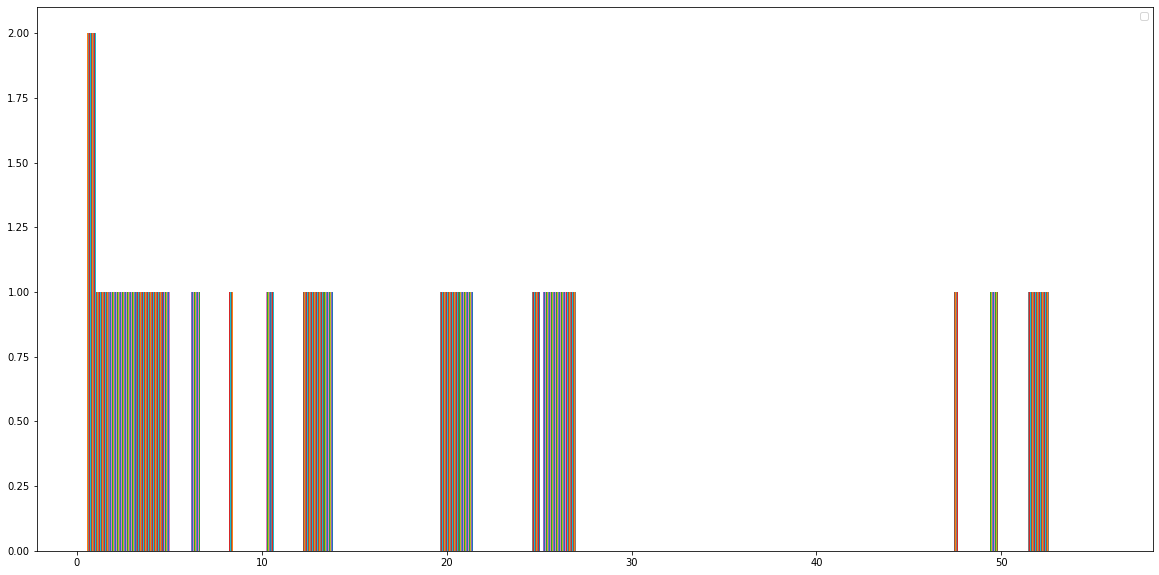

In [56]:
# Plot the histogram
plt.figure(figsize=(20,10))
plt.hist(x=x_input)
plt.legend()
plt.show()

In [68]:
# Spot-Check Algorithms
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/rgm/Python/anaconda3/lib/python3.7/site-package

LR: 0.355192 (0.093943)
LDA: 0.339331 (0.087425)
KNN: 0.323257 (0.072989)
CART: 0.315149 (0.070283)
NB: 0.160313 (0.065776)
SVM: 0.320555 (0.078603)


/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rgm/Python/anaconda3/lib/python3.

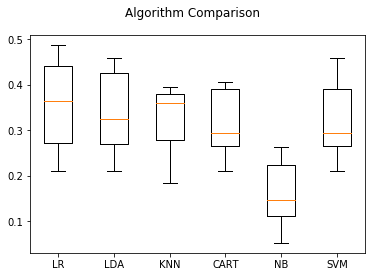

In [69]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()